In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df =  pd.read_csv('../../../data/train_V2.csv')

In [3]:
df[:5]

,Unnamed: 0,OutcomeType,Cat,Dog,Female,Intact,Male,Neutered,Spayed,Age,...,Tan,Tick,Tiger,Torbie,Tortie,Tricolor,White,Yellow,Mixed,Purebred
0,0,Return_to_owner,0,1,0,0,1,1,0,365,...,0,0,0,0,0,0,1,0,1,0
1,1,Euthanasia,1,0,1,0,0,0,1,365,...,0,0,0,0,0,0,0,0,1,0
2,2,Adoption,0,1,0,0,1,1,0,730,...,0,0,0,0,0,0,1,0,1,0
3,3,Transfer,1,0,0,1,1,0,0,21,...,0,0,0,0,0,0,0,0,1,0
4,4,Transfer,0,1,0,0,1,1,0,730,...,1,0,0,0,0,0,0,0,0,1


In [4]:
feature_cols = ["Cat","Dog","Female","Intact","Male","Neutered","Age","Spayed","Purebred"]

In [5]:
X = df[feature_cols]
y = df["OutcomeType"]


In [6]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=3)

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


# our decition tree classifier.
my_decisiontree = DecisionTreeClassifier(random_state=3)

# trainning the classifier
my_decisiontree.fit(X_train, y_train)

y_predict_dt = my_decisiontree.predict(X_test)

score_dt = accuracy_score(y_test, y_predict_dt)

print(score_dt)

0.635741769987174


In [8]:
from sklearn.utils import resample



Voting = []

for i in range(19):
    bootstrap_size = int(0.8 * X.shape[0])
    newX, newY = resample(X_train, y_train, n_samples = bootstrap_size , random_state=i , replace = True)
    Base_DecisionTree = DecisionTreeClassifier(random_state=3)
    Base_DecisionTree.fit(newX, newY)
    Voting.append(Base_DecisionTree.predict(X_test))

    

    
# initialize a dictionary of each index to 0:0 and 1:0
CountVoting = { x: {"Adoption": 0, "Euthanasia": 0, "Transfer": 0, "Died": 0, "Return_to_owner": 0} for x in range (len(Voting[0])) }



# # do a poll
for x in range(19):
    for y in range(len(Voting[x])):
        CountVoting[y][Voting[x][y]] += 1
        
# grabing most voted key and set it to an array. 
ResultsFromVote = [max(CountVoting[x], key=CountVoting[x].get) for x in CountVoting]


score_dt = accuracy_score(y_test, ResultsFromVote)
print(score_dt)

0.6364899529713552


In [9]:
# Intact
# Age

import matplotlib.pyplot as plt
import numpy as np


In [54]:
# Create the plot object

# _, ax = plt.subplots()


def scatterplot(x_data, y_data, color, x_label="", y_label="", title="", yscale_log=False):

    
    print(len(x_data))
    print(len(y_data))
    # Plot the data, set the size (s), color and transparency (alpha)
    # of the points
    ax.scatter(x_data, y_data, s = 20, color = color, alpha = 1)

    if yscale_log == True:
        ax.set_yscale('log')

    # Label the axes and provide a title
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    


1815
1815
4268
4268
10345
10345
10301
10301
0
0


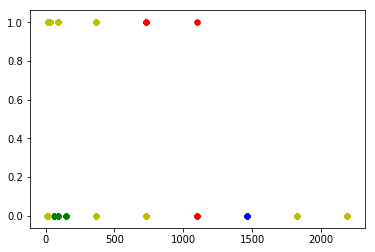

In [55]:
Age = X["Age"]

Intact = X["Intact"]
Outcome = df["OutcomeType"]
Colors = { "Euthanasia": "r", "Return_to_owner": "b", "Adoption": "g", "Transfer": "y", "Died": "c"}
Age_Intact_Graph = { "r": [[],[]], "b": [[],[]], "g": [[],[]], "y": [[],[]], "c": [[],[]] }
for x in Age:
    Age_Intact_Graph[Colors[Outcome[x]]][0].append(Age[x])
    Age_Intact_Graph[Colors[Outcome[x]]][1].append(Intact[x])

_, ax = plt.subplots()

for i in Colors:
    scatterplot(Age_Intact_Graph[Colors[i]][0], Age_Intact_Graph[Colors[i]][1], Colors[i])
